In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('sentimentdataset.csv')

# Removing unnecessary columns
data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

# Display the cleaned dataframe
print(data.head())

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes       Country  \
0   #Nature #Park                                  15.0   30.0     USA         
1   #Traffic #Morning                               5.0   10.0     Canada      
2   #Fitness #

In [9]:
# Trim whitespace from the 'Platform' column
data['Platform'] = data['Platform'].str.strip()

# Recalculate the value counts for 'Platform'
platform_counts = data['Platform'].value_counts()

print(platform_counts)

Platform
Instagram    258
Twitter      243
Facebook     231
Name: count, dtype: int64


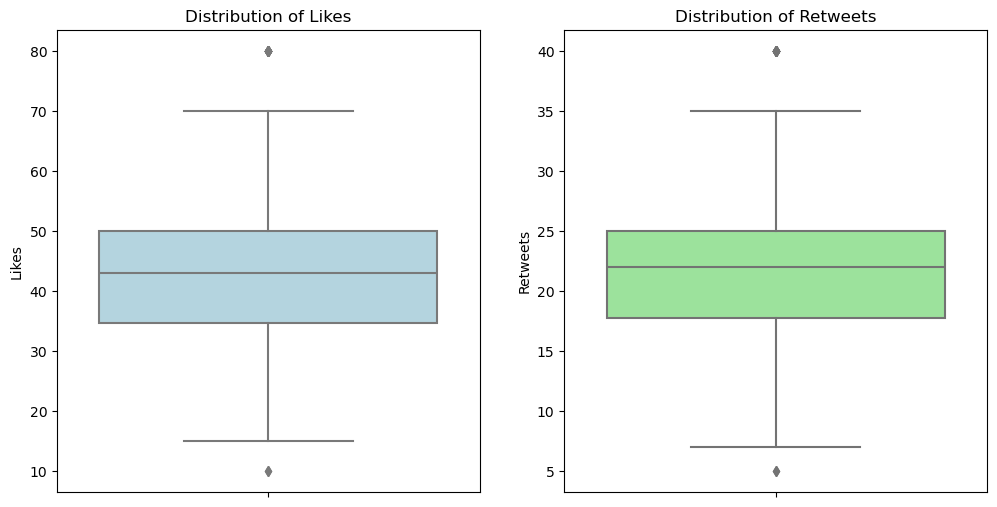

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=data['Likes'], color='lightblue')
plt.title('Distribution of Likes')
plt.ylabel('Likes')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['Retweets'], color='lightgreen')
plt.title('Distribution of Retweets')
plt.ylabel('Retweets')
plt.show()

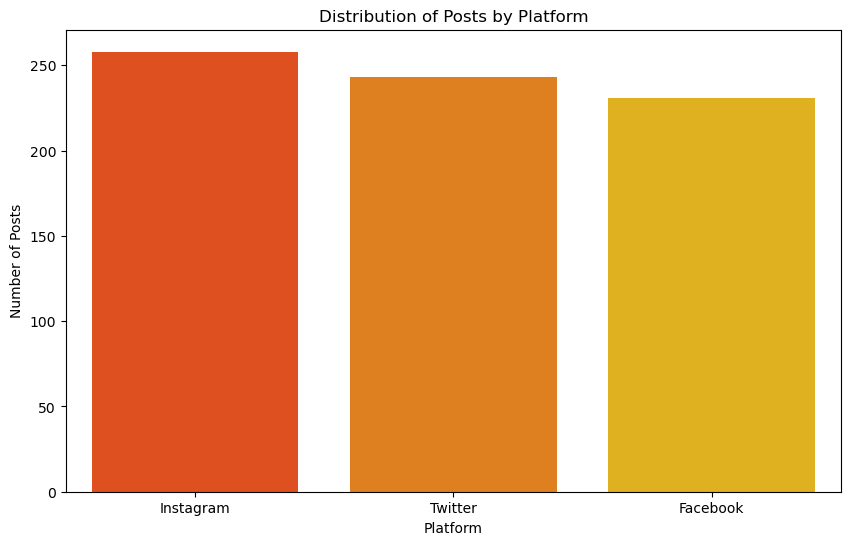

In [12]:
platform_counts = data['Platform'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='autumn')
plt.title('Distribution of Posts by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Posts')
plt.show()

C:\Users\akshi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akshi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


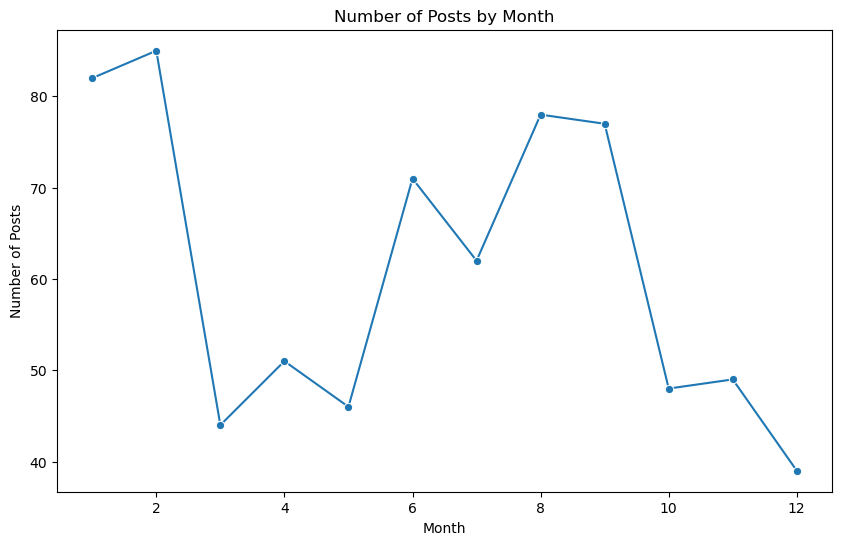

In [13]:
monthly_posts = data.groupby('Month').size()
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_posts.index, y=monthly_posts.values, marker='o')
plt.title('Number of Posts by Month')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.show()

C:\Users\akshi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


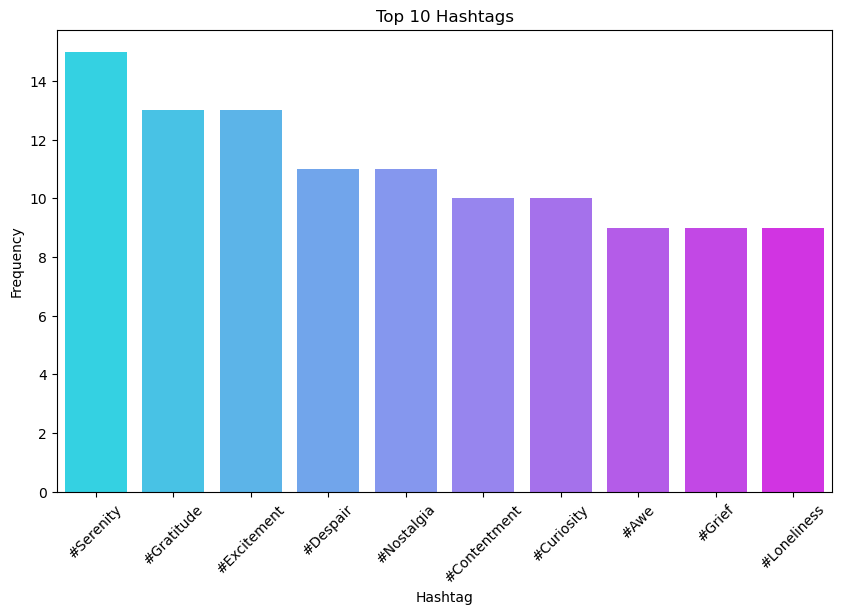

In [27]:
from collections import Counter

# Extracting all hashtags into a list
hashtags = sum((data['Hashtags'].str.split().map(lambda x: [tag.strip() for tag in x])).tolist(), [])

# Counting hashtag frequency
hashtag_counts = Counter(hashtags)
most_common_hashtags = hashtag_counts.most_common(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=[tag for tag, count in most_common_hashtags], y=[count for tag, count in most_common_hashtags], palette='cool')
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations
correlation_matrix = data[['Likes', 'Retweets', 'Hour', 'Day', 'Month']].corr()

print(correlation_matrix)

             Likes  Retweets      Hour       Day     Month
Likes     1.000000  0.998482  0.195331  0.011489  0.066643
Retweets  0.998482  1.000000  0.196955  0.009213  0.073265
Hour      0.195331  0.196955  1.000000  0.044072  0.137835
Day       0.011489  0.009213  0.044072  1.000000 -0.135873
Month     0.066643  0.073265  0.137835 -0.135873  1.000000


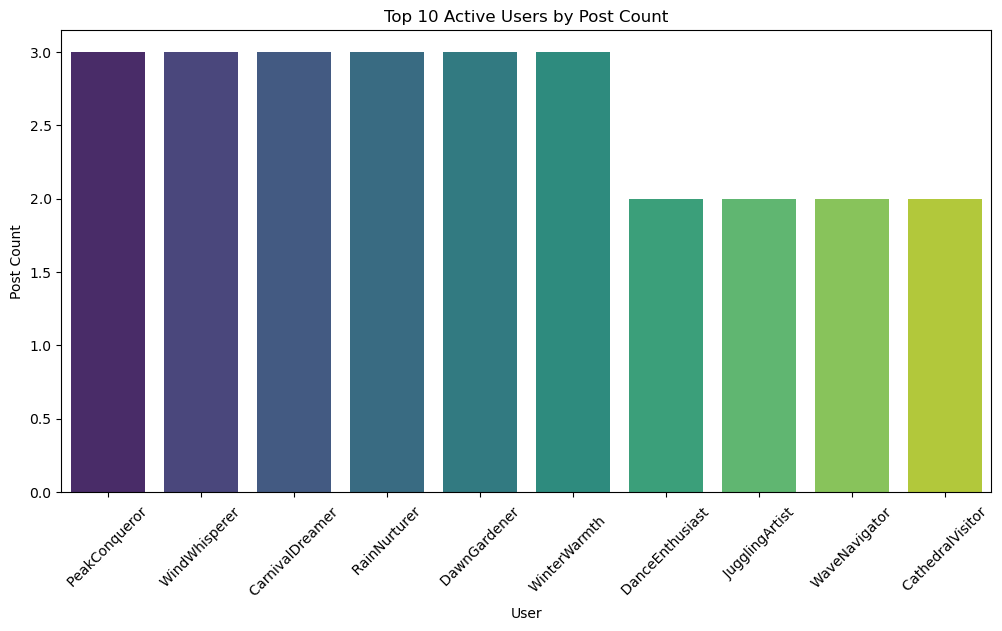

In [23]:
user_activity = data.groupby('User').agg({'Text': 'count', 'Likes': 'sum', 'Retweets': 'sum'}).rename(columns={'Text': 'Post Count'})
top_users = user_activity.sort_values(by='Post Count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_users.index, y=top_users['Post Count'], palette='viridis')
plt.title('Top 10 Active Users by Post Count')
plt.xlabel('User')
plt.ylabel('Post Count')
plt.xticks(rotation=45)
plt.show()

In [28]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download NLTK resources (if not already installed)
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply cleaning to the Text column
data['Cleaned_Text'] = data['Text'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akshi\AppData\Roaming\nltk_data...


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000)  # You can adjust the number of features

# Fit and transform the Cleaned_Text column to numeric data
features = tfidf.fit_transform(data['Cleaned_Text'])

In [36]:
import pandas as pd

# Load the dataset
data = pd.read_csv('sentimentdataset.csv')

# Remove unnecessary columns and clean text fields
data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
data['Text'] = data['Text'].str.strip()
data['Hashtags'] = data['Hashtags'].str.strip()
data['Sentiment'] = data['Sentiment'].str.strip()
data['User'] = data['User'].str.strip()
data['Platform'] = data['Platform'].str.strip()
data['Country'] = data['Country'].str.strip()

# Convert 'Timestamp' to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Vectorize text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(data['Text'])
y = data['Sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate the model
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

                      precision    recall  f1-score   support

          Acceptance       1.00      1.00      1.00         2
          Admiration       0.00      0.00      0.00         2
           Affection       0.00      0.00      0.00         1
         Ambivalence       0.00      0.00      0.00         1
               Anger       0.00      0.00      0.00         1
        Anticipation       0.00      0.00      0.00         1
             Arousal       0.00      0.00      0.00         3
                 Awe       0.00      0.00      0.00         2
                 Bad       0.00      0.00      0.00         1
            Betrayal       0.00      0.00      0.00         3
              Bitter       0.00      0.00      0.00         1
          Bitterness       0.00      0.00      0.00         1
         Bittersweet       0.00      0.00      0.00         1
             Boredom       0.00      0.00      0.00         1
            Calmness       0.00      0.00      0.00         1
       

C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\akshi\anaconda3\Lib\site-packages\sklea

In [41]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Set up CountVectorizer for LDA
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = count_vectorizer.fit_transform(data['Text'])

# Initialize and fit LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Function to display topics and their key words
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, count_vectorizer.get_feature_names_out(), 10)

Topic 0:
new surprise day night garden friends friend exploring world awe
Topic 1:
art hopeful like shattered dreams creativity emotions optimism tomorrow book
Topic 2:
life joy echoes laughter embracing family dreams day new air
Topic 3:
heart feeling thoughts new project moments night challenging warmth sense
Topic 4:
dance concert beauty new upcoming music adventure nature life excitement


In [40]:
# Group data by country and sentiment to see distribution
country_sentiments = data.groupby(['Country', 'Sentiment']).size().unstack(fill_value=0)
print(country_sentiments)

Sentiment       Acceptance  Accomplishment  Admiration  Adoration  Adrenaline  \
Country                                                                         
Australia                4               1           0          0           0   
Austria                  0               0           0          0           0   
Belgium                  0               0           0          0           0   
Brazil                   0               0           0          0           0   
Cambodia                 0               0           0          0           0   
Canada                   3               0           0          0           0   
China                    0               0           0          0           0   
Colombia                 0               0           0          0           0   
Czech Republic           0               0           0          0           0   
Denmark                  0               0           0          0           0   
France                   0  

In [48]:
# Mock function to assign broad sentiments if you haven't any sentiment analysis in place
def assign_broad_sentiment(text):
    if 'good' in text.lower() or 'happy' in text.lower():
        return 'Positive'
    elif 'bad' in text.lower() or 'sad' in text.lower():
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to your dataframe if 'Broad_Sentiment' isn't already defined
if 'Broad_Sentiment' not in data.columns:
    data['Broad_Sentiment'] = data['Text'].apply(assign_broad_sentiment)

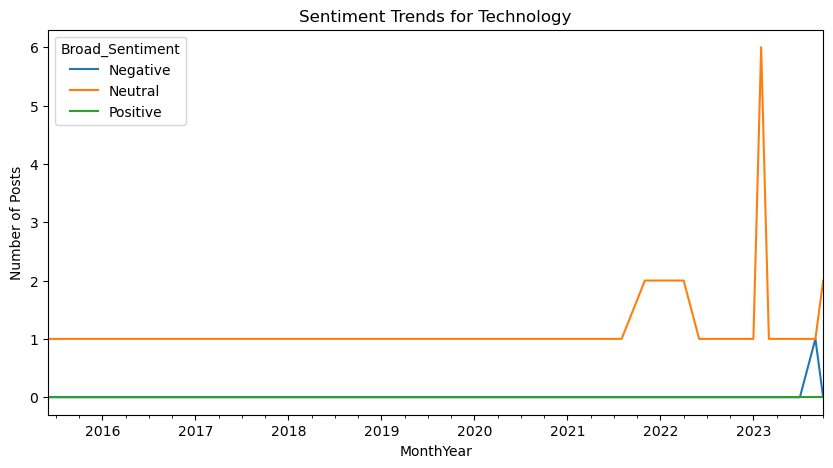

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure your data includes a 'Timestamp' and it's in datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['MonthYear'] = data['Timestamp'].dt.to_period('M')

# Aggregate data by MonthYear, Topic, and Sentiment
try:
    trend_data = data.groupby(['MonthYear', 'Topic', 'Broad_Sentiment']).size().unstack(fill_value=0)

    # Choose a topic of interest and plot
    topic_interest = 'Technology'  # Replace 'Technology' with any topic from your analysis
    trend_plot = trend_data.xs(topic_interest, level='Topic')
    if not trend_plot.empty:
        trend_plot.plot(kind='line', figsize=(10, 5))
        plt.title(f"Sentiment Trends for {topic_interest}")
        plt.ylabel('Number of Posts')
        plt.show()
    else:
        print("No data available for the selected topic.")
except KeyError as e:
    print(f"KeyError: {e} - Check your data frame columns and data preparation steps.")

In [52]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Given text data
text_data = [
    "new surprise day night garden friends friend exploring world awe",
    "art hopeful like shattered dreams creativity emotions optimism tomorrow book",
    "life joy echoes laughter embracing family dreams day new air",
    "heart feeling thoughts new project moments night challenging warmth sense",
    "dance concert beauty new upcoming music adventure nature life excitement"
]

# Preprocess the text data
# Tokenization
tokenized_text = [nltk.word_tokenize(sentence) for sentence in text_data]

# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
sentiment_scores = [sid.polarity_scores(sentence) for sentence in text_data]

# Topic Extraction using LDA
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_data)
lda = LatentDirichletAllocation(n_components=1, random_state=42)  # Assuming one topic
lda.fit(X)
topic_words = [vectorizer.get_feature_names_out()[i] for i in lda.components_[0].argsort()[-10:]]  # Get top 10 words for the topic

print("Sentiment Scores:")
for i, score in enumerate(sentiment_scores):
    print(f"Sentence {i+1}: {score}")

print("\nTopic Extraction (LDA):")
print(" ".join(topic_words))

Sentiment Scores:
Sentence 1: {'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'compound': 0.8126}
Sentence 2: {'neg': 0.143, 'neu': 0.184, 'pos': 0.673, 'compound': 0.8885}
Sentence 3: {'neg': 0.0, 'neu': 0.419, 'pos': 0.581, 'compound': 0.8658}
Sentence 4: {'neg': 0.0, 'neu': 0.534, 'pos': 0.466, 'compound': 0.6249}
Sentence 5: {'neg': 0.0, 'neu': 0.429, 'pos': 0.571, 'compound': 0.8519}

Topic Extraction (LDA):
joy family embracing echoes air dreams night life day new


In [53]:
import re
from textblob import TextBlob

def clean_text(text):
    text = text.strip()  # Remove leading/trailing whitespace
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    return text

In [54]:
def get_sentiment(text):
    sentiment = TextBlob(text)
    return sentiment.sentiment.polarity, sentiment.sentiment.subjectivity

In [55]:
# Clean the text in the DataFrame
data['Cleaned_Text'] = data['Text'].apply(clean_text)

# Extract sentiment
data[['Sentiment_Polarity', 'Sentiment_Subjectivity']] = data['Cleaned_Text'].apply(
    lambda text: pd.Series(get_sentiment(text))
)

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Set up the CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
data_vectorized = vectorizer.fit_transform(data['Cleaned_Text'])

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Setup CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
data_vectorized = vectorizer.fit_transform(data['Cleaned_Text'])

# Setup and execute LDA
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(data_vectorized)

# Function to display topics
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d:" % (topic_idx)] = " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]])
    return topic_dict

# Print topics
topics = display_topics(lda, vectorizer.get_feature_names_out(), 10)
for topic_name, keywords in topics.items():
    print(topic_name, keywords)

Topic 0: sense dance whispers feeling heart success curiosity night hopeful tomorrow
Topic 1: day laughter garden joy emotions gratitude life air like cup
Topic 2: dreams shattered life like acceptance challenging echoes completing finding embracing
Topic 3: beauty nature moment surprise moments life old feeling serenity lost
Topic 4: new art concert night school project exploring time personal sky


In [60]:
from textblob import TextBlob
import re

# Clean the text data
def clean_text(text):
    text = text.strip()  # Remove leading/trailing whitespace
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    return text

# Apply text cleaning
data['Cleaned_Text'] = data['Text'].apply(clean_text)

# Function to get sentiment polarity and subjectivity using TextBlob
def get_sentiment(text):
    sentiment = TextBlob(text)
    return sentiment.sentiment.polarity, sentiment.sentiment.subjectivity

# Apply the function to get sentiment polarity and subjectivity
data[['Sentiment_Polarity', 'Sentiment_Subjectivity']] = data['Cleaned_Text'].apply(
    lambda text: pd.Series(get_sentiment(text))
)

# Display the updated DataFrame with sentiment information
data[['Text', 'Cleaned_Text', 'Sentiment_Polarity', 'Sentiment_Subjectivity']].head(700)

,Text,Cleaned_Text,Sentiment_Polarity,Sentiment_Subjectivity
0,Enjoying a beautiful day at the park!,Enjoying a beautiful day at the park!,0.750000,0.800000
1,Traffic was terrible this morning.,Traffic was terrible this morning.,-1.000000,1.000000
2,Just finished an amazing workout! 💪,Just finished an amazing workout! 💪,0.750000,0.900000
3,Excited about the upcoming weekend getaway!,Excited about the upcoming weekend getaway!,0.468750,0.750000
4,Trying out a new recipe for dinner tonight.,Trying out a new recipe for dinner tonight.,0.136364,0.454545
...,...,...,...,...
695,Got a flat tire on the way to an important mee...,Got a flat tire on the way to an important mee...,-0.166667,0.597222
696,Feeling a sense of emptiness after a close fri...,Feeling a sense of emptiness after a close fri...,-0.500000,1.000000
697,Facing rejection from a dream college. Dishear...,Facing rejection from a dream college. Dishear...,-0.125000,0.375000
698,Encountering online toxicity during a gaming s...,Encountering online toxicity during a gaming s...,0.300000,0.200000


C:\Users\akshi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


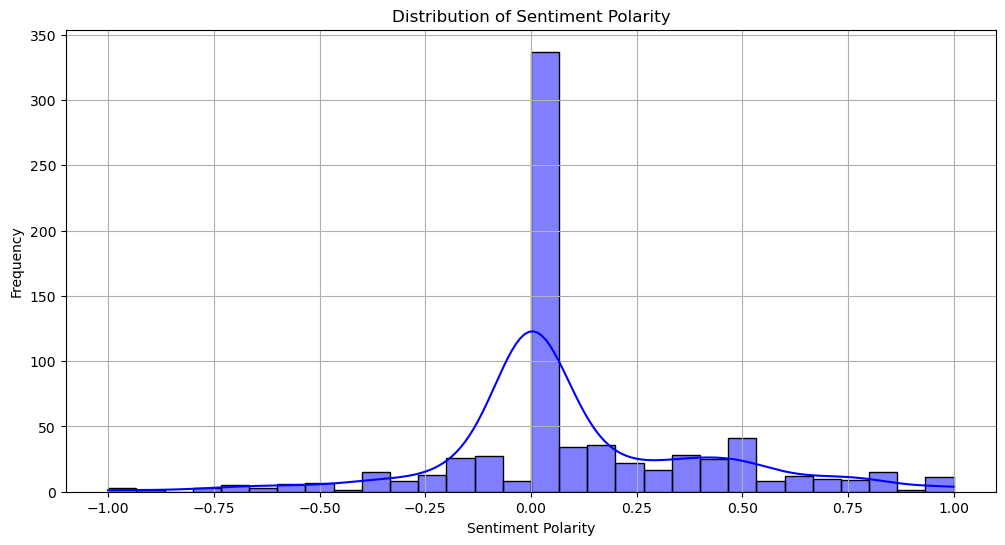

In [61]:
# Attempting to plot again
plt.figure(figsize=(12, 6))

# Histogram and density plot of sentiment polarity
sns.histplot(data['Sentiment_Polarity'], bins=30, kde=True, color='blue')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()